# Solving Systems of ODEs with Python

ODEs are a widely used tool in mathematical modeling to model any number of dynamic physical processes. For all but the simplest ODE systems, analytical solutions are rarely possible. Scipy has long had robust libraries for simulating ODEs. 

Scipy 1.0.0 introduced a new, integrated (pun intended, sorry) API to make numerical integration of ODEs easier and more consistent.

## Dependencies

To run this notebook, you will require the following packages:
- numpy
- scipy > 1.0
- matplotlib
- ffmpeg installed and in your path (if you are using conda, you can do `conda config --add channels conda-forge` followed by `conda install -c menpo ffmpeg` (Optional - required for animations)
- jupyter notebook


## A simple ODE

Enzymes are biological catalysts that facilitate chemical reactions in biological systems. In computational biology, a common problem is to figure out how fast a given biochemical reaction will proceed, given initial conditions and a particular enzyme. 

In a typical one-substrate system, the progress of the chemical reaction is modeled using an equation called Michaelis-Menten kinetics.

This equation takes into account the enzyme's affinity towards the substrate, the maximum number of enzyme sites available and the substrate concentration to model the non-linear reaction kinetics typically displayed by enzyme-catalyzed systems.

$$
\frac{dS}{dt} = \frac{V_{max}.S}{K_m + S}
$$


## Introducting scipy.integrate

Scipy contains a package called `integrate` which contains various functions used to simulate differential equation systems. In scipy 1.0.0, a new API called `solve_ivp` was introduced.

In [1]:
import numpy as np
from scipy.integrate import ode, odeint, odepack, solve_ivp
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
plt.style.use('ggplot')
%matplotlib inline

In [3]:
vmax = 0.5
S0 = 5
Km = 1e-4

def mmk(t, S):
    rate = - (vmax * S)/(Km + S) * t
    return np.array(rate)

In [4]:
results = solve_ivp(mmk, [0, 10], [S0], max_step=0.01)

c:\users\cgkan\anaconda2\envs\py36\lib\site-packages\scipy\integrate\_ivp\rk.py:145: RuntimeWarning: divide by zero encountered in double_scalars
  max(1, SAFETY * error_norm ** (-1 / (order + 1))))


In [5]:
def init_plot(X, Y1):
    plt.clf()
    fig, ax = plt.subplots()
    ax.set_xlim((0, max(X)))
    ax.set_ylim((-0.02, Y1.max()+1))
    line1, = ax.plot([], [], lw=2)
    return line1, fig, ax

def init():
    line1.set_data([], [])
    return (line1,)

def animate(i):
    x = X[:i]
    y1 = Y1[:i]
    line1.set_data(x, y1)
    return line1,
    

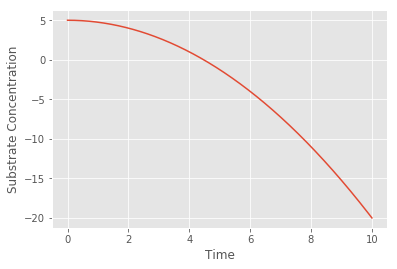

In [6]:
X, Y1 = results['t'], results['y'][0]
plt.plot(X, Y1)
plt.xlabel('Time')
plt.ylabel('Substrate Concentration')
# line1, fig, ax = init_plot(X, Y1)
# anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(X), interval=5, blit=True)
# HTML(anim.to_html5_video())

## Oops! What happened?

The problem is that Michaelis-Menten kinetics are extremely sensitive to the step-size used. Since the equation has a gradient even in negative substrate concentrations, the enzyme concentration will rapidly become negative if the substrate concentration drops even slightly below zero. Such systems are known as stiff systems. 

Fortunately, scipy provides solvers to integrate stiff systems as well.

In [7]:
results = solve_ivp(mmk, [0, 10], [S0], max_step=0.01, method='BDF')

c:\users\cgkan\anaconda2\envs\py36\lib\site-packages\scipy\integrate\_ivp\bdf.py:417: RuntimeWarning: divide by zero encountered in power
  factors = error_norms ** (-1 / np.arange(order, order + 3))


In [ ]:
X, Y1 = results['t'], results['y'][0]
line1, fig, ax = init_plot(X, Y1)
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(X), interval=5, blit=True)
HTML(anim.to_html5_video())

## How about systems of ODEs?

- Another common biology model is the Lotka-Volterra model of predator-prey population dynamics. The system has two equations describing the population of prey and predator respectively. Essentially, the model describes the effect of predation on prey population and the effect of prey availability on population of the predator. The equations governing this model are given by:

$$
\frac{dx}{dt} = \alpha x - \beta x y
$$

$$
\frac{dy}{dt} = \delta \beta x y - \gamma y
$$

In [38]:
ALPHA, BETA, GAMMA, DELTA = 1, 0.4, 1.5, 0.75
def lotka_volterra(t, Y):
    x, y = Y[0], Y[1]
    dx = ALPHA * x - BETA * x * y
    dy = DELTA * BETA * x * y - GAMMA * y
    return [dx, dy]

In [39]:
results = solve_ivp(lotka_volterra, [0, 50], [10, 5])

In [44]:
def init_plot(X, Y1, Y2):
    plt.clf()
    fig, ax = plt.subplots()
    ax.set_xlim(( 0, max(X)))
    ax.set_ylim((0, max(Y1.max(), Y2.max())))
    line1, = ax.plot([], [], lw=2)
    line2, = ax.plot([], [], lw=2)
    return line1, line2, fig, ax

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return (line1, line2)

def animate(i):
    x = X[:i]
    y1 = Y1[:i]
    y2 = Y2[:i]
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    return line1, line2
    

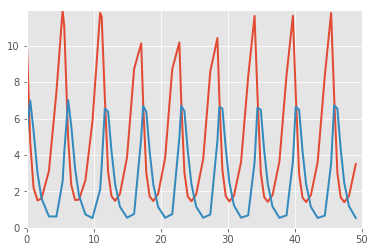

In [43]:
X, Y1, Y2 = results['t'], results['y'][0], results['y'][1]
line1, line2, fig, ax = init_plot(X, Y1, Y2)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(X), interval=50, blit=True)
HTML(anim.to_html5_video())

## A bit ugly and rough, isn't it?

We can fix this by setting a max time step.

In [47]:
results = solve_ivp(lotka_volterra, [0, 50], [10, 5], max_step=0.01)

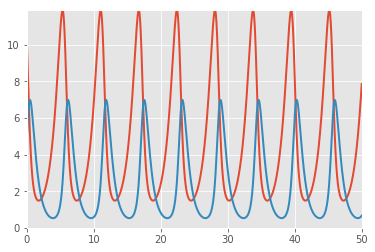

In [49]:
X, Y1, Y2 = results['t'], results['y'][0], results['y'][1]
line1, line2, fig, ax = init_plot(X, Y1, Y2)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(X), interval=5, blit=True)
HTML(anim.to_html5_video())